<h1 align="center">Classificação de Texto Multilíngue com Transformers</h1>

Data Scientist.:Eddy Giusepe Chirinos Isidro

Este script é baseado no maravilhoso artigo do [Ng Wai Foong](https://levelup.gitconnected.com/multilingual-text-classification-with-transformers-2147fe179c6b).

Nesse artigo, do **Ng Wai Foong**, ele fala que usar o [spaCy](https://spacy.io/) é muito bom devido a que o spaCy aborda muitas tarefas do dia dia. <font color="red">Por exemplo:</font> classificar palavrões ou propagandas, etc. Mas, também, ele diz que a arquitetura existente para `spaCy` têm os seguintes problemas:

* Ter que treinar um novo modelo de forma independente para cada idioma

* Ter que configurar e instalar tokenizadores especializados para determinados idiomas (chinês, japonês, coreano, russo, vietnamita, etc.)


Para contornar esses problemas, ele ensina a como treinar um único modelo de **Classificação de Texto Multilíngue** usando `Transformers`:


* `Fine-tune` ao Transformers do `HuggingFace` pré-treinado para `Classificação de texto`

* Baseado na arquitetura `DistilmBERT` (também há suporte para arquitetura `mBERT` normal)

* Exportar o modelo `Fine-tuned` para `ONNX` para inferência



# Configurações (setup)

É altamente recomendável criar um novo ambiente virtual antes da instalação. Ative o ambiente virtual instale a biblioteca `Transformers` da seguinte forma:

In [ ]:
%pip install transformers

In [2]:
import transformers

print(transformers.__version__)

4.26.1


Observe que este tutorial é baseado na versão `4.26.1` do Transformers, por favor, consulte o arquivo de [requirement](https://github.com/huggingface/transformers/blob/main/examples/pytorch/text-classification/requirements.txt) atualizado se você estiver usando uma versão mais recente.

Execute o seguinte comando para instalar todos os pacotes necessários:

```
pip install -r requirements.txt
```

In [ ]:
# Aqui estou lembrando como instalar bibliotecas na "LINHA DE COMANDO" no Jupyter VSC:

%cd /home/eddygiusepe/1_Eddy_Giusepe/NLP_Transformers/Multilingual_Text_Classification_with_Transformers

%pip install -r requirements.txt

Vá para o [repositório a seguir](https://github.com/huggingface/transformers/tree/main/examples/pytorch/text-classification) e salve o arquivo `run_glue.py` no diretório de trabalho. É o script de treinamento oficial para o `Fine-tuning` de um modelo `Transformers.


```
run_glue.py é a versão padrão do Pytorch para fine-tuning em uma única máquina. Existe outro script de treinamento chamado run_glue_no_trainer.py, destinado ao treinamento distribuído em várias máquinas usando a biblioteca accelerate.
```

Abra o script de treinamento e comente a função `check_min_version` (isso é necessário para evitar exceções, pois este tutorial é baseado na antiga versão estável do Transformers PyPI):

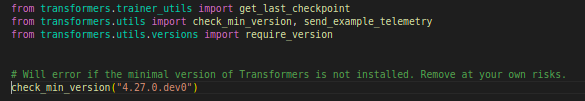

# Dataset

O script de treinamento aceita `CSV` ou `JSON` como arquivos de `Treinamento/Validação`. Cada arquivo deve ter os seguintes cabeçalhos ou pares chave-valor:

* `sentence` — o texto de exemplo

* `label` — um número para representar as classes. Por exemplo, `0` para negativo e `1` para positivo.


Para aqueles que não possuem seus próprios dados de treinamento, você pode usar os conjuntos de dados [Stanford Sentiment Treebank](https://huggingface.co/datasets/sst2) (`análise de sentimento`) do `HuggingFace`.

Coloque os conjuntos de dados de treinamento (`train.csv`) e validação (`dev.csv`) no mesmo diretório de trabalho do arquvo `run_glue.py`. O script de treinamento atual aceita apenas um único arquivo de treinamento e um único arquivo de validação.

## Visualizando os Dados com Pandas

In [9]:
# Ver --> https://huggingface.co/datasets/sst2/viewer/default/train

import pandas as pd

sst2_train =pd.read_csv('/home/eddygiusepe/1_Eddy_Giusepe/NLP_Transformers/Multilingual_Text_Classification_with_Transformers/train.tsv', sep='\t') 

sst2_train.head()

,sentence,label
0,hide new secretions from the parental units,0
1,"contains no wit , only labored gags",0
2,that loves its characters and communicates som...,1
3,remains utterly satisfied to remain the same t...,0
4,on the worst revenge-of-the-nerds clichés the ...,0


In [10]:
sst2_train.shape

(67349, 2)

In [11]:
sst2_dev =pd.read_csv('/home/eddygiusepe/1_Eddy_Giusepe/NLP_Transformers/Multilingual_Text_Classification_with_Transformers/dev.tsv', sep='\t') 

sst2_dev.head()

,sentence,label
0,it 's a charming and often affecting journey .,1
1,unflinchingly bleak and desperate,0
2,allows us to hope that nolan is poised to emba...,1
3,"the acting , costumes , music , cinematography...",1
4,"it 's slow -- very , very slow .",0


In [12]:
sst2_dev.shape

(872, 2)